# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, sklearn, and scipy.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load Dataset
Load the customer segmentation dataset from the provided URL using pandas.

In [10]:
# Load the customer segmentation dataset from the provided URL using pandas
df = pd.read_csv("./customer_segmentation.csv")

# Display the first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis (EDA)
Perform EDA to understand the dataset, including summary statistics, missing values, and data visualization.

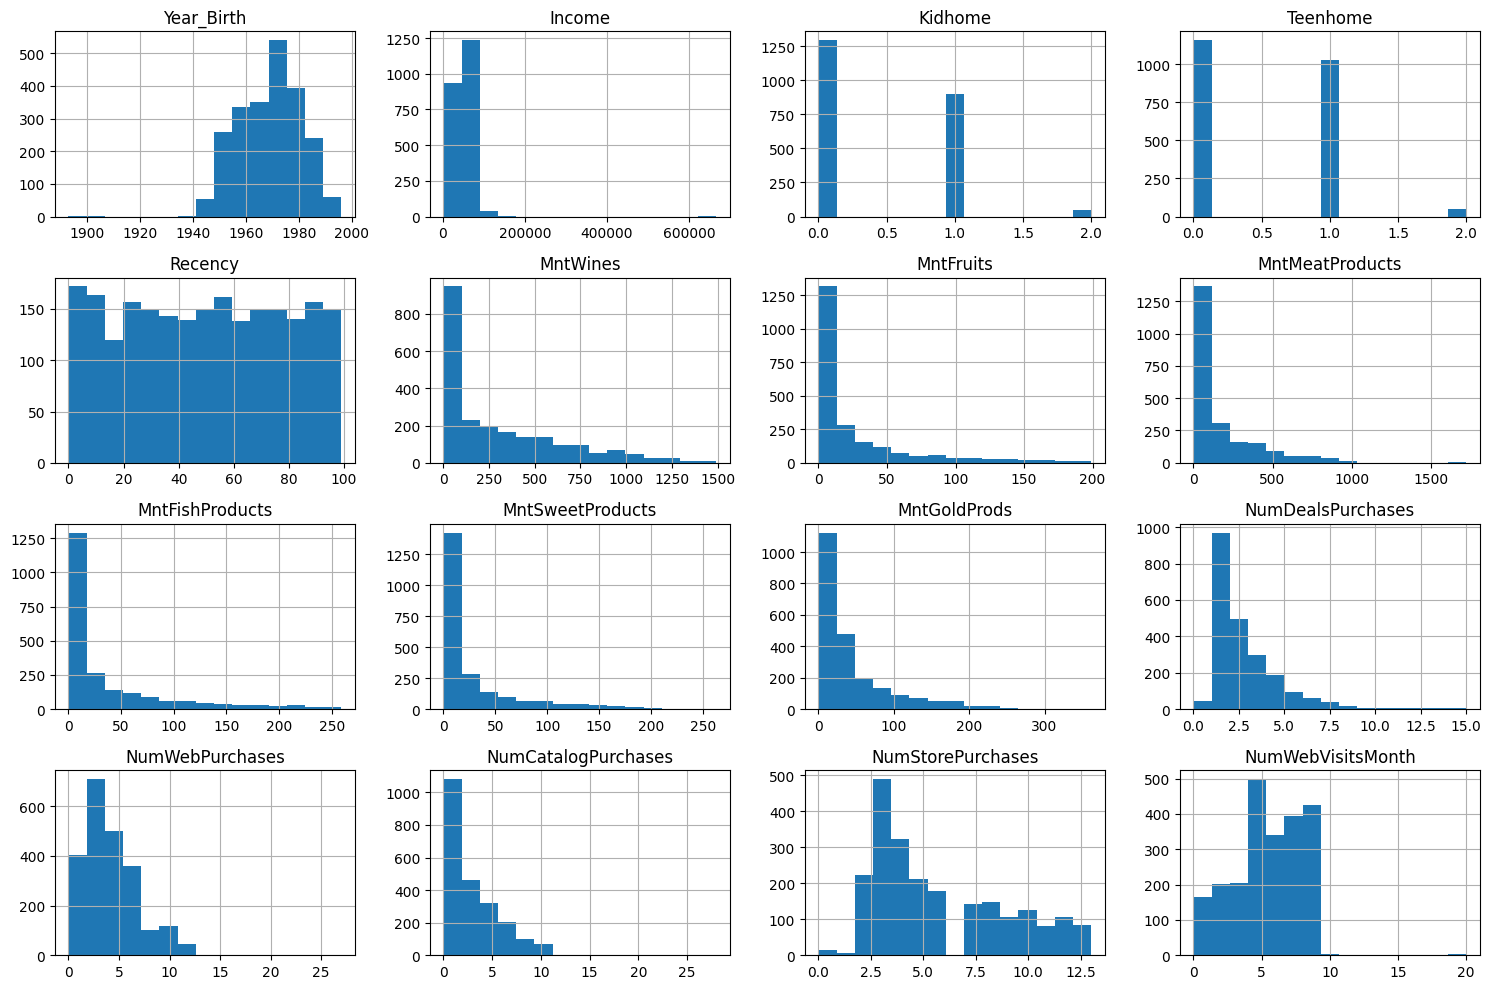

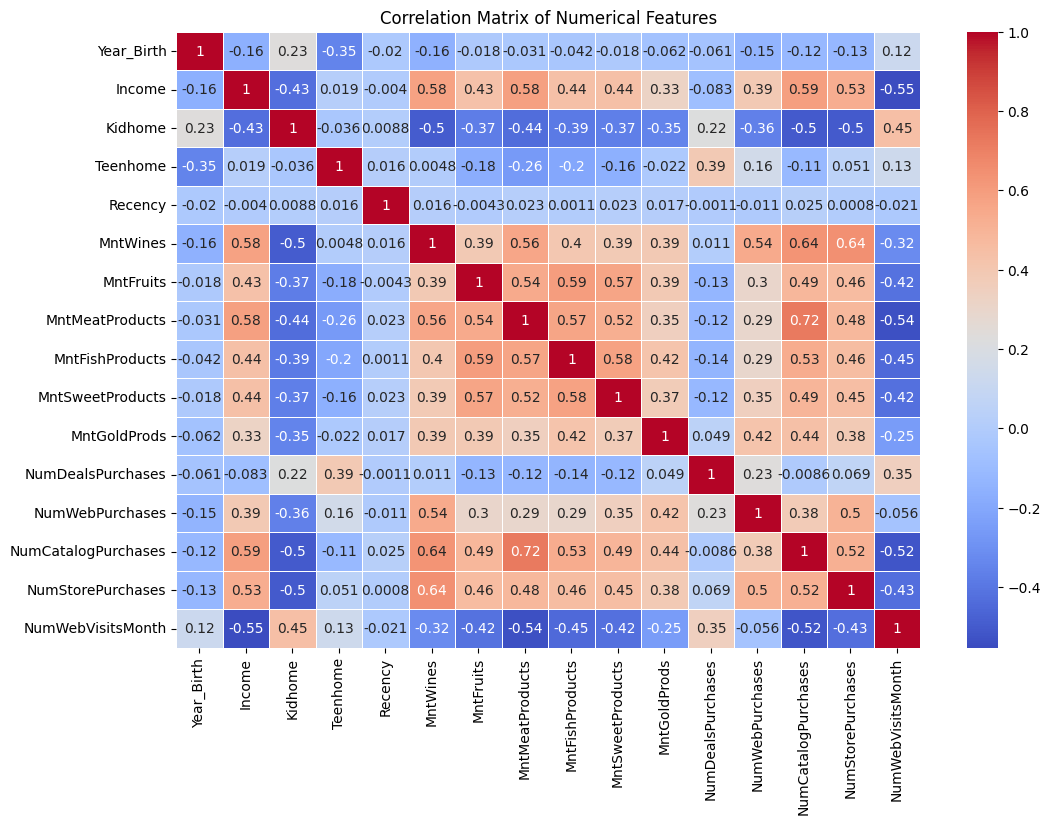

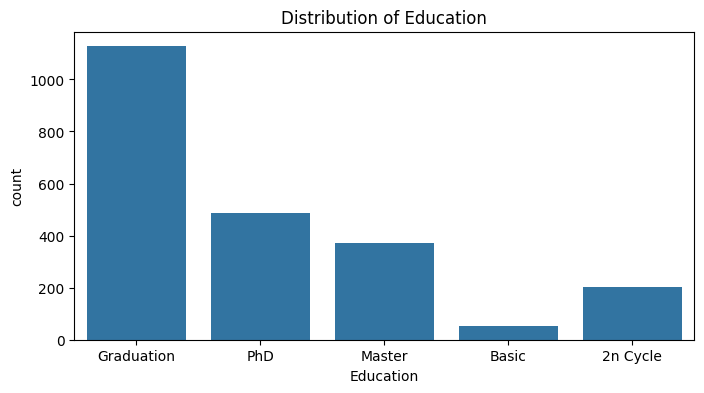

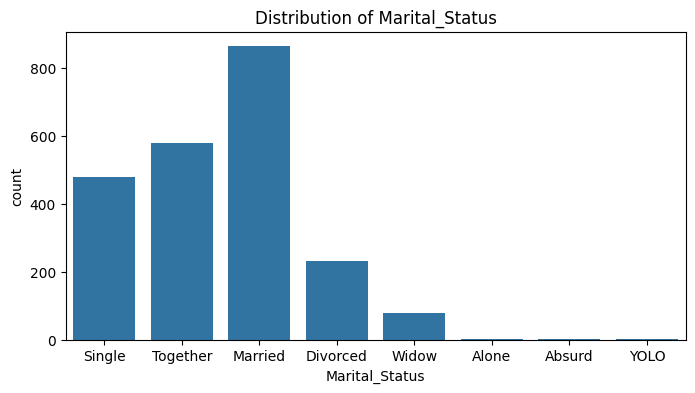

In [11]:
# Display summary statistics of the dataset
df.describe()

# Check for missing values in the dataset
df.isnull().sum()

# Visualize the distribution of numerical features
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Visualize the distribution of categorical features
categorical_features = ['Education', 'Marital_Status']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Data Preprocessing
Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.

In [12]:
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Drop columns
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the preprocessed dataset
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,True,False,False,False,False,False,True,False,False,False
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,True,False,False,False,False,False,True,False,False,False
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,True,False,False,False,False,False,False,True,False,False
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,True,False,False,False,False,False,False,True,False,False
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,False,False,True,False,False,True,False,False,False,False


# K-Means Clustering
Apply K-Means clustering to the preprocessed data and visualize the clusters.

d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

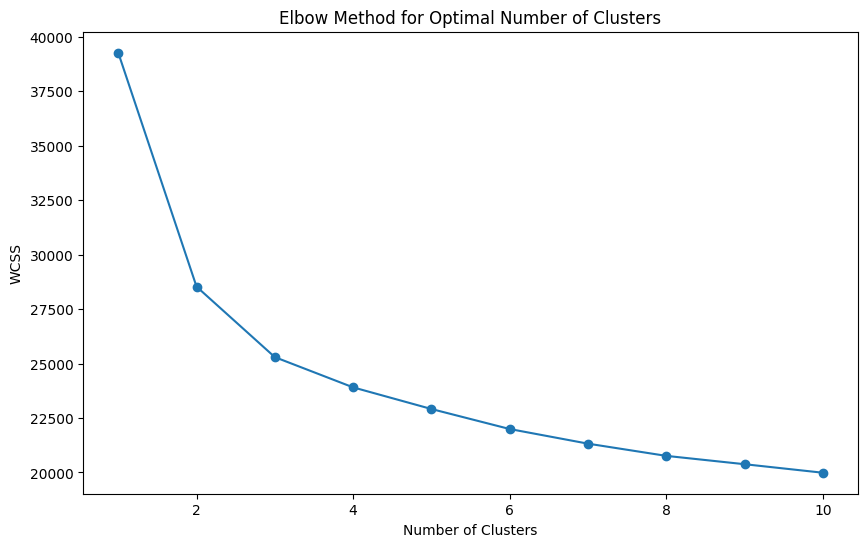

d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


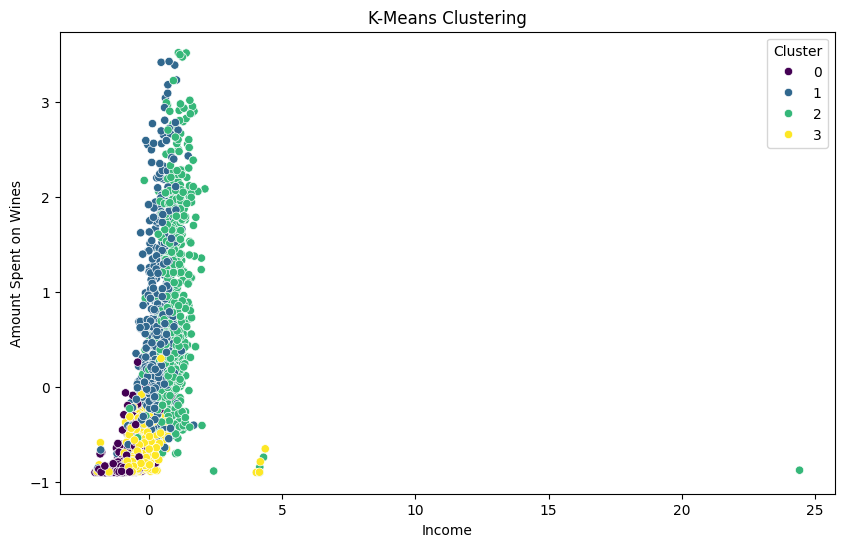

Silhouette Score: 0.22547131674947404
Davies-Bouldin Score: 1.6938342410256455


In [13]:
# K-Means Clustering

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Assuming 4 is the optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wines')
plt.legend(title='Cluster')
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(df, df['Cluster'])
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Hierarchical Clustering
Apply hierarchical clustering to the preprocessed data and visualize the dendrogram.

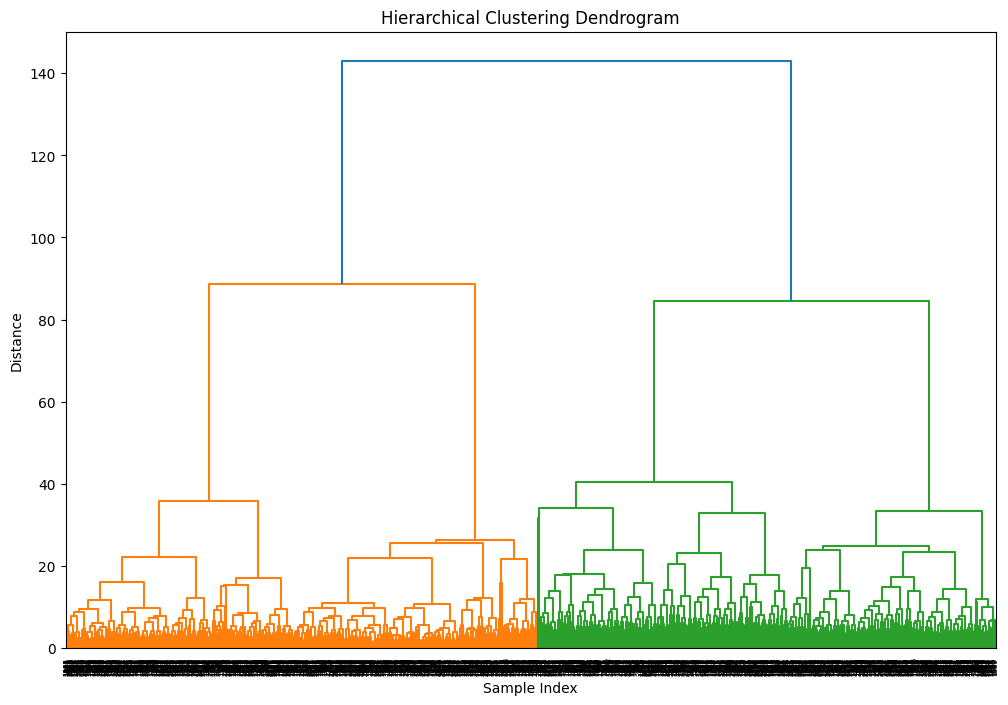

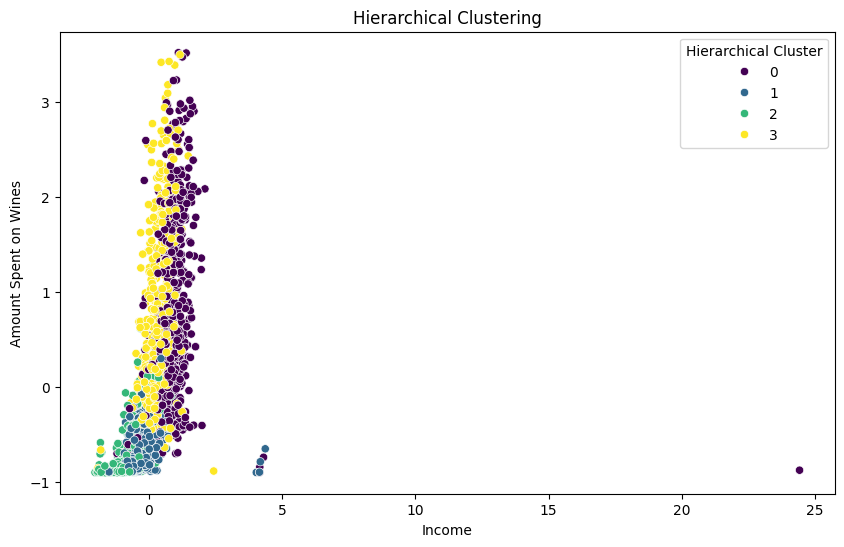

Silhouette Score for Hierarchical Clustering: 0.25942364122136946
Davies-Bouldin Score for Hierarchical Clustering: 1.4477235047751829


In [14]:
# Hierarchical Clustering

# Apply hierarchical clustering to the preprocessed data
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering with the optimal number of clusters
hierarchical_clusters = 4  # Assuming 4 is the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=hierarchical_clusters)
df['Hierarchical_Cluster'] = agg_clustering.fit_predict(df)

# Visualize the hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wines')
plt.legend(title='Hierarchical Cluster')
plt.show()

# Calculate silhouette score for hierarchical clustering
silhouette_avg_hierarchical = silhouette_score(df, df['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}')

# Calculate Davies-Bouldin score for hierarchical clustering
davies_bouldin_avg_hierarchical = davies_bouldin_score(df, df['Hierarchical_Cluster'])
print(f'Davies-Bouldin Score for Hierarchical Clustering: {davies_bouldin_avg_hierarchical}')

# Hyperparameter Optimization
Optimize hyperparameters for K-Means and hierarchical clustering using methods such as the elbow method and silhouette score.

d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Apps\Conda\envs\complex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

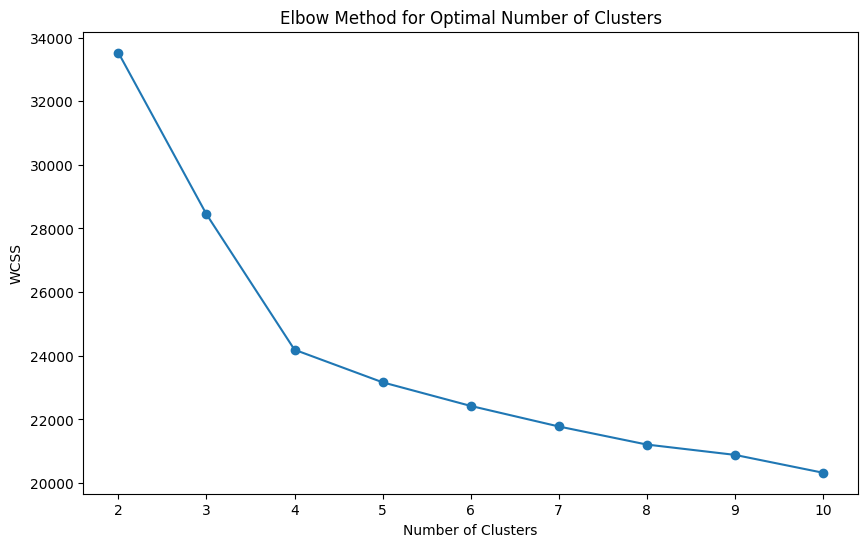

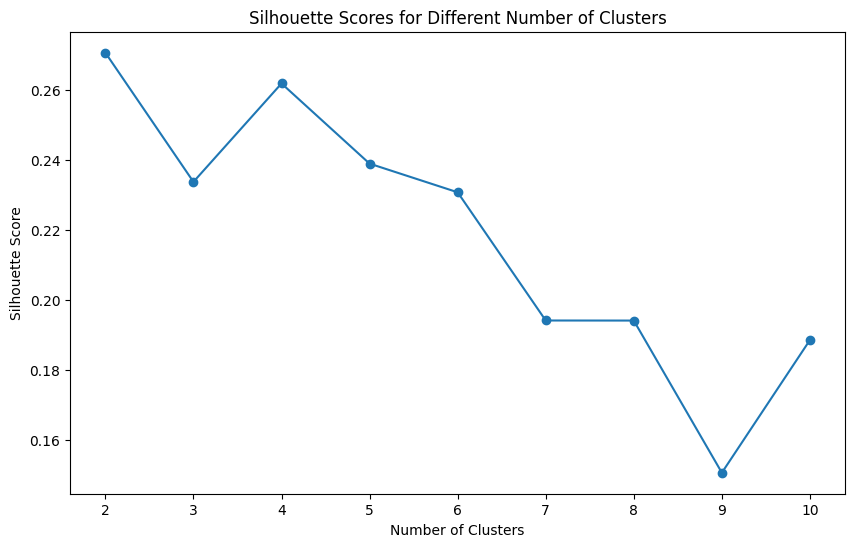

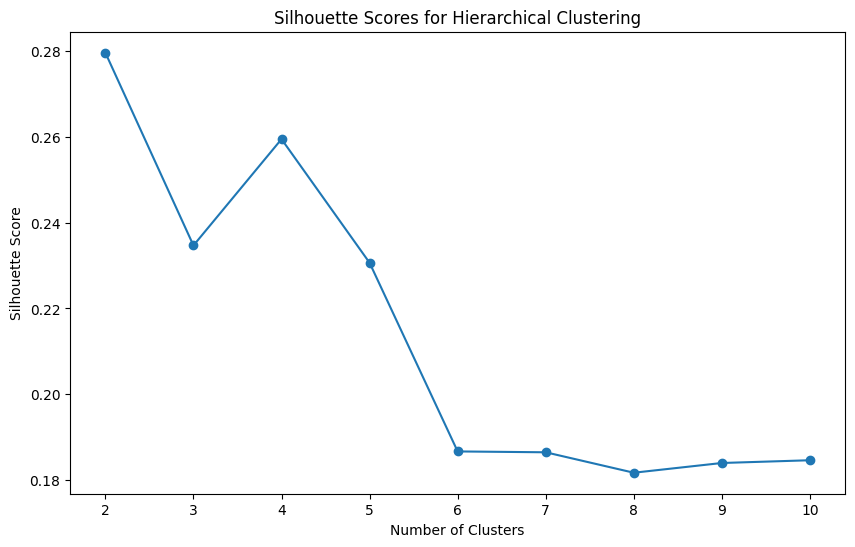

In [15]:
# Hyperparameter Optimization

# Optimize hyperparameters for K-Means using the Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Optimize hyperparameters for Hierarchical Clustering using Silhouette Score
silhouette_scores_hierarchical = []
for i in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=i)
    cluster_labels = agg_clustering.fit_predict(df)
    silhouette_scores_hierarchical.append(silhouette_score(df, cluster_labels))

# Plot the Silhouette Scores for Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_hierarchical, marker='o')
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Model Validation
Validate the clustering models using appropriate validation metrics such as silhouette score and Davies-Bouldin index.

In [16]:
# Model Validation

# Validate K-Means clustering model using silhouette score and Davies-Bouldin index
silhouette_avg_kmeans = silhouette_score(df, df['Cluster'])
davies_bouldin_avg_kmeans = davies_bouldin_score(df, df['Cluster'])

print(f'K-Means Clustering - Silhouette Score: {silhouette_avg_kmeans}')
print(f'K-Means Clustering - Davies-Bouldin Score: {davies_bouldin_avg_kmeans}')

# Validate Hierarchical clustering model using silhouette score and Davies-Bouldin index
silhouette_avg_hierarchical = silhouette_score(df, df['Hierarchical_Cluster'])
davies_bouldin_avg_hierarchical = davies_bouldin_score(df, df['Hierarchical_Cluster'])

print(f'Hierarchical Clustering - Silhouette Score: {silhouette_avg_hierarchical}')
print(f'Hierarchical Clustering - Davies-Bouldin Score: {davies_bouldin_avg_hierarchical}')

K-Means Clustering - Silhouette Score: 0.25666532989485225
K-Means Clustering - Davies-Bouldin Score: 1.4934114552719184
Hierarchical Clustering - Silhouette Score: 0.25942364122136946
Hierarchical Clustering - Davies-Bouldin Score: 1.4477235047751829


# Additional Clustering Methods
Investigate and apply at least two other clustering methods (e.g., DBSCAN, Agglomerative Clustering) to the data.

DBSCAN did not create more than one cluster. Adjust the parameters and try again.


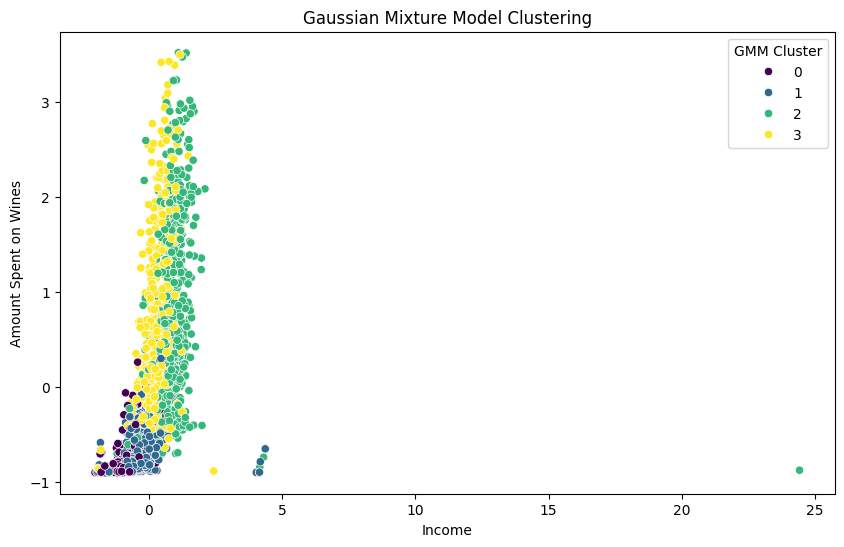

Silhouette Score for GMM Clustering: 0.2828430868396054
Davies-Bouldin Score for GMM Clustering: 1.3898839248290233


In [37]:
# Additional Clustering Methods

# Import necessary libraries for additional clustering methods
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# DBSCAN Clustering
silhouette_avg_dbscan = 0
davies_bouldin_avg_dbscan = 0

# Apply DBSCAN clustering to the preprocessed data
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', n_jobs=-1, leaf_size=90)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

# Check if DBSCAN created more than one cluster
if len(set(df['DBSCAN_Cluster'])) > 1:
	# Visualize the DBSCAN clusters
	plt.figure(figsize=(10, 6))
	sns.scatterplot(data=df, x='Income', y='MntWines', hue='DBSCAN_Cluster', palette='viridis')
	plt.title('DBSCAN Clustering')
	plt.xlabel('Income')
	plt.ylabel('Amount Spent on Wines')
	plt.legend(title='DBSCAN Cluster')
	plt.show()

	# Calculate silhouette score for DBSCAN clustering
	silhouette_avg_dbscan = silhouette_score(df, df['DBSCAN_Cluster'])
	print(f'Silhouette Score for DBSCAN Clustering: {silhouette_avg_dbscan}')

	# Calculate Davies-Bouldin score for DBSCAN clustering
	davies_bouldin_avg_dbscan = davies_bouldin_score(df, df['DBSCAN_Cluster'])
	print(f'Davies-Bouldin Score for DBSCAN Clustering: {davies_bouldin_avg_dbscan}')
else:
	print("DBSCAN did not create more than one cluster. Adjust the parameters and try again.")

# Gaussian Mixture Model Clustering

# Apply Gaussian Mixture Model clustering to the preprocessed data
gmm = GaussianMixture(n_components=4, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df)

# Visualize the GMM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='MntWines', hue='GMM_Cluster', palette='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wines')
plt.legend(title='GMM Cluster')
plt.show()

# Calculate silhouette score for GMM clustering
silhouette_avg_gmm = silhouette_score(df, df['GMM_Cluster'])
print(f'Silhouette Score for GMM Clustering: {silhouette_avg_gmm}')

# Calculate Davies-Bouldin score for GMM clustering
davies_bouldin_avg_gmm = davies_bouldin_score(df, df['GMM_Cluster'])
print(f'Davies-Bouldin Score for GMM Clustering: {davies_bouldin_avg_gmm}')

# Comparison of Clustering Methods
Compare the results of different clustering methods and discuss the findings.

C:\Users\pms_l\AppData\Local\Temp\ipykernel_214452\749343513.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Silhouette Score', data=comparison_df, palette='viridis')


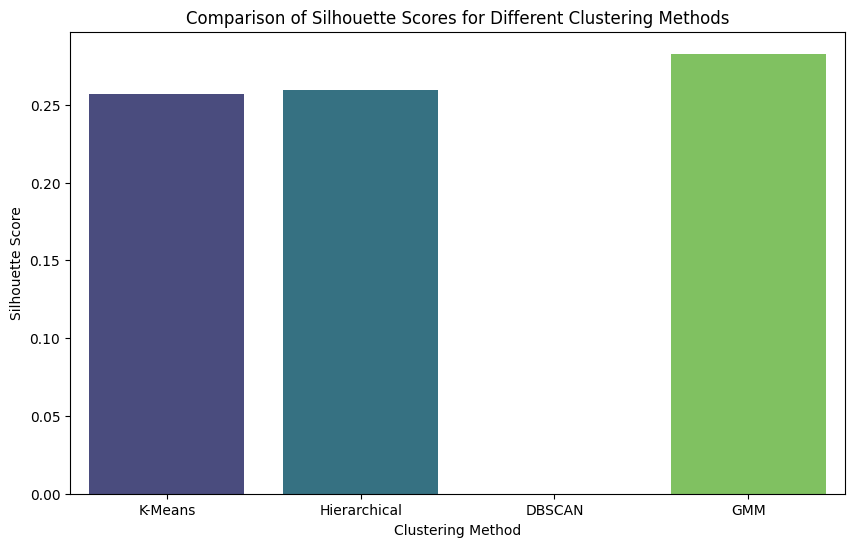

C:\Users\pms_l\AppData\Local\Temp\ipykernel_214452\749343513.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Davies-Bouldin Score', data=comparison_df, palette='viridis')


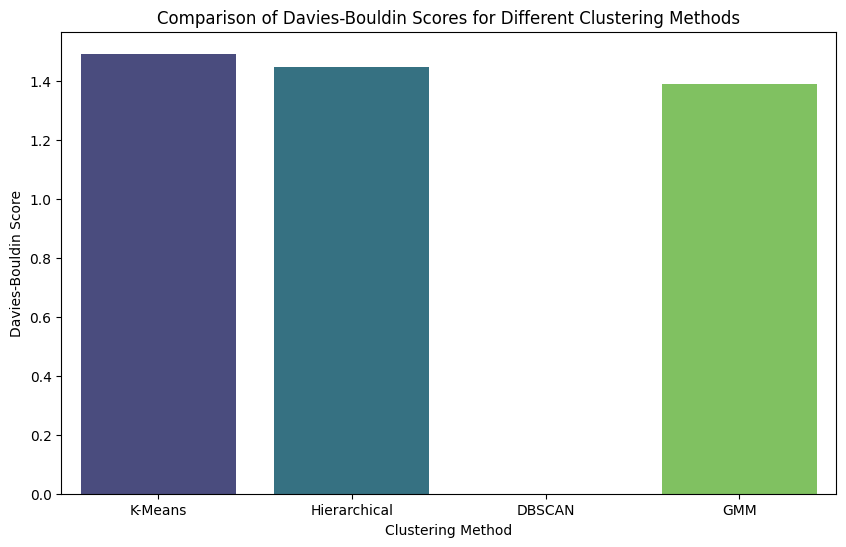

The comparison of different clustering methods shows that:
K-Means Clustering - Silhouette Score: 0.25666532989485225, Davies-Bouldin Score: 1.4934114552719184
Hierarchical Clustering - Silhouette Score: 0.25942364122136946, Davies-Bouldin Score: 1.4477235047751829
DBSCAN Clustering - Silhouette Score: 0, Davies-Bouldin Score: 0
Gaussian Mixture Model Clustering - Silhouette Score: 0.2828430868396054, Davies-Bouldin Score: 1.3898839248290233
Based on the Silhouette Scores and Davies-Bouldin Scores, we can conclude that the best clustering method for this dataset is ...


In [30]:
# Comparison of Clustering Methods

# Create a DataFrame to store the results of different clustering methods
comparison_df = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [silhouette_avg_kmeans, silhouette_avg_hierarchical, silhouette_avg_dbscan, silhouette_avg_gmm],
    'Davies-Bouldin Score': [davies_bouldin_avg_kmeans, davies_bouldin_avg_hierarchical, davies_bouldin_avg_dbscan, davies_bouldin_avg_gmm]
})

# Display the comparison DataFrame
comparison_df

# Plot the comparison of Silhouette Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Silhouette Score', data=comparison_df, palette='viridis')
plt.title('Comparison of Silhouette Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.show()

# Plot the comparison of Davies-Bouldin Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Davies-Bouldin Score', data=comparison_df, palette='viridis')
plt.title('Comparison of Davies-Bouldin Scores for Different Clustering Methods')
plt.xlabel('Clustering Method')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Discuss the findings
print("The comparison of different clustering methods shows that:")
print(f"K-Means Clustering - Silhouette Score: {silhouette_avg_kmeans}, Davies-Bouldin Score: {davies_bouldin_avg_kmeans}")
print(f"Hierarchical Clustering - Silhouette Score: {silhouette_avg_hierarchical}, Davies-Bouldin Score: {davies_bouldin_avg_hierarchical}")
print(f"DBSCAN Clustering - Silhouette Score: {silhouette_avg_dbscan}, Davies-Bouldin Score: {davies_bouldin_avg_dbscan}")
print(f"Gaussian Mixture Model Clustering - Silhouette Score: {silhouette_avg_gmm}, Davies-Bouldin Score: {davies_bouldin_avg_gmm}")

print("Based on the Silhouette Scores and Davies-Bouldin Scores, we can conclude that the best clustering method for this dataset is ...")